## Author : Loka Akash Reddy
### Innomatics Research Labs - Data Science October - 2021
### Tasks - Data Analysis
### Task 3 : Missing Value + Outlier + ML
###  Kindly follow the instructions given in this document : https://docs.google.com/document/d/1gnRdpd5Iw2c-QUcXDHXIeI8oVLxTDtOYhqbwSNSbkiU/edit?usp=sharing
### Dataset Link : https://drive.google.com/file/d/1GtwjrZpP6jiZWXyYShiMHBamUstFgaEF/view

### Data Description :

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

**Fields:**

The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

**Acknowledgements:**

This dataset named “adult” is found in the UCI machine learning repository
#### http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
#### http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

**Research Papers:**

#### https://drive.google.com/file/d/1rfTR8bgYPSV8LlpPpsMNBTa4FM2LafZ6/view?usp=sharing
(Read this entire paper and try to perform some experiments and try to match the results)

#### https://drive.google.com/file/d/1nXBcKeYFtgQvGjj2QxYngn7zvqKAB12f/view?usp=sharing
(From above research paper implements Extra Tree Classifier, Handling missing values, categorical variable encoding, gradient boosting for classification).

**Resources** 

#### https://github.com/bansalkanav/Machine_Learning_and_Deep_Learning/tree/master/7.%20Missing%20Value%20Treatment
#### https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [5]:
df = pd.read_csv('adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Analyzing the data

In [7]:
df.shape

(48842, 15)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
# Getting information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Checking datatypes

In [19]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

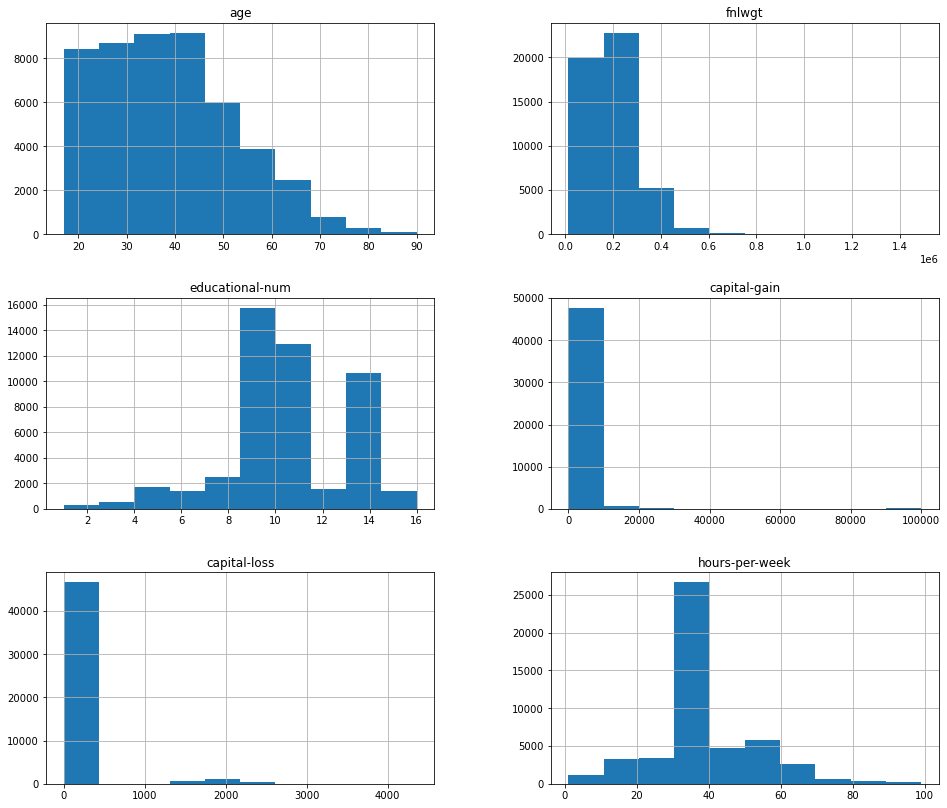

In [14]:
df.hist(figsize=(16, 14))
pyplot.show()

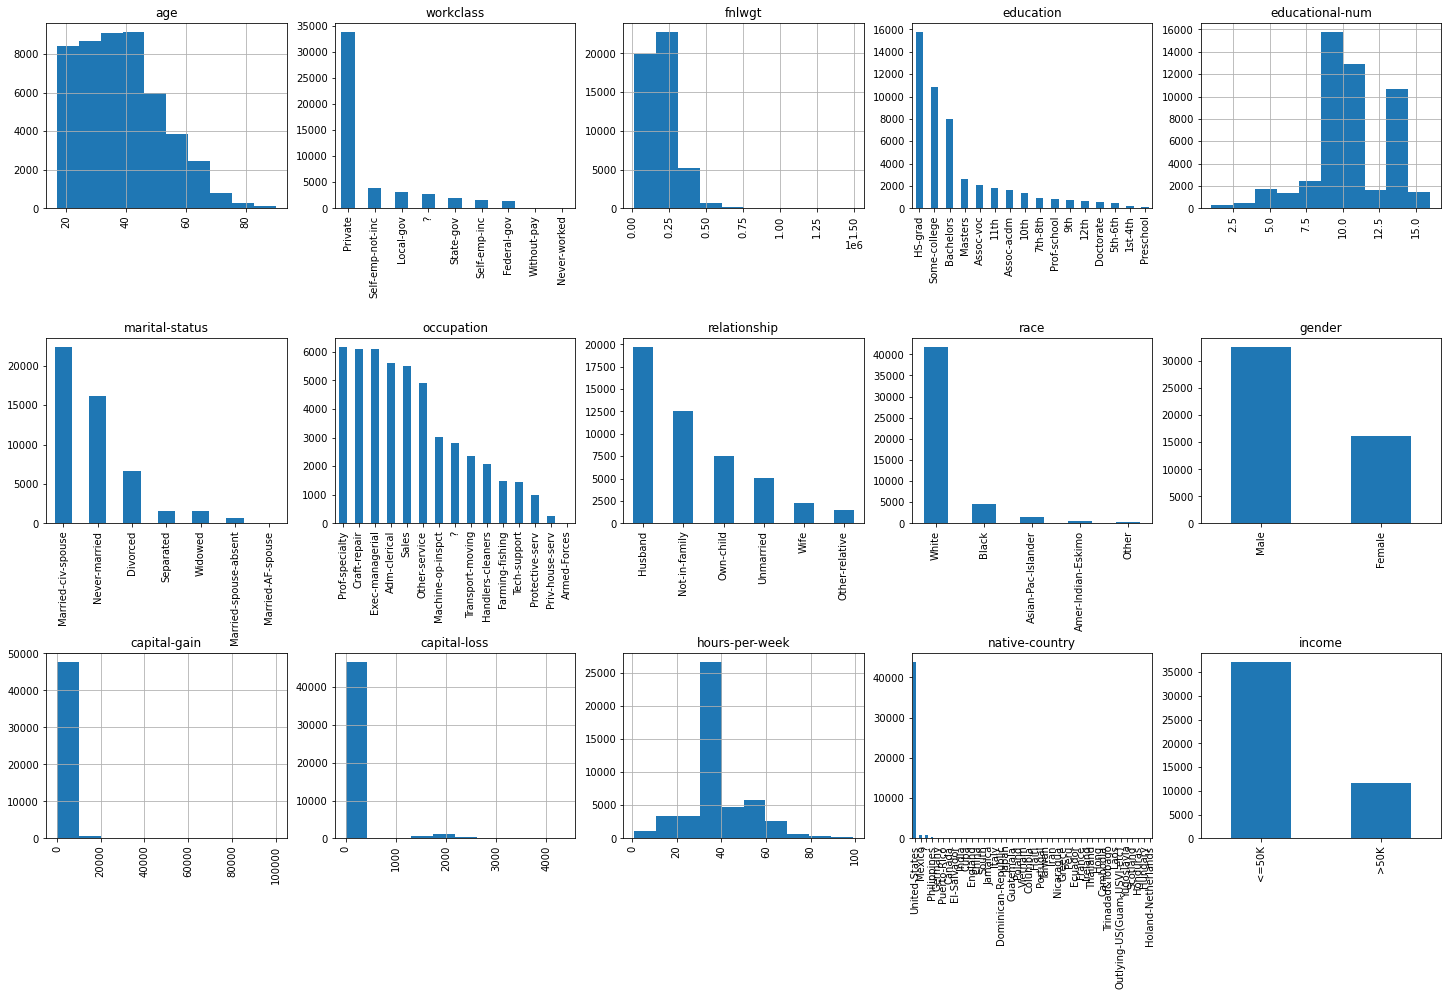

In [18]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)